## Web Scraping criticas sobre o filme: À Procura da felicidade

#### Informações coletadas do site: www.adorocinema.com

In [1]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import csv

In [32]:
adorocinema_urls = ['https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=']*12

In [33]:
adorocinema_urls

['https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=']

### 1- Acrescentando o número de cada página de criticas a minha lista de urls

In [36]:
pagina = int(1)
while (pagina <=12) :
    url_pos = int(pagina-1)
    adorocinema_urls[url_pos] = adorocinema_urls[url_pos] + str(pagina)
    pagina = int(pagina + 1)

In [37]:
adorocinema_urls

['https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=1',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=2',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=3',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=4',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=5',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=6',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=7',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=8',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=9',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=10',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=11',
 'https://www.adorocinema.com/filmes/filme-54098/criticas/espectadores/?page=12']

### 2- Recuperando dados da URL

In [38]:
criticas = []
for url in adorocinema_urls:
    uClient = uReq(url)             # Fazendo a requisição da pagina (seu código em HTML)
    pagina_html = uClient.read()    # Lendo o código HTML
    uClient.close()
    pagina_soup = soup(pagina_html, "html.parser")       # Divide as informações que estão na pagina HTML
    criticas = criticas + [criticas.text for criticas in pagina_soup.find_all("div", {"class": "content-txt review-card-content"})]   # Pegando o texto da parte do código HTML que contem os comentáros das criticas (aperte F12 no site do adorocinema para visualizar seu código HTML)

### 3- Análisando e manipulando as criticas

In [39]:
len(criticas)

112

In [41]:
criticas

['\n                    Raras as pessoas que não soltam se quer uma lágrima em alguma cena deste longa. Duas notáveis:\nspoiler: \n trancando a porta do banheiro com o pé e quando ele consegue o emprego\n. Emocionante demais!!Will Smith perfeito! Filme esplêndido!\n        \n            ',
 '\n                    Filmaço digno de Oscar. O tipo de filme que sempre que passa na tv e a pessoa pode, assiste novamente.\n        \n            ',
 '\n                    Com certeza, o melhor filme do Will Smith, na minha opinião, em termos de atuação, uma história que de envolve no filme, roteiro muito bem criado, e surpreende ainda mais, quando você sabe que quem interpreta o filho dele no filme, é o filho dele Jaden Smith, excelente filme.\n        \n            ',
 '\n                    Tocante! Uma linda história real de um pai, que realmente deve acontecer nos dias de hoje! Bom para quem esta "Reclamando De Barriga Cheia" ver quem realmente está sofrendo nesse mundo a fora! Linda histór

### 4- Criando um arquivo CSV com os comentários das críticas

#### Realizei isso para que eu não tenha que rodar o script novamente toda vez que for acrescentando novos scripts

In [45]:
with open('adorocinema_criticas.csv','w', encoding='utf-8') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    wr.writerow(criticas)

### 5- Rodando os pacotes para exibição das críticas

In [47]:
import csv
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hiago.andrade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hiago.andrade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hiago.andrade\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [48]:
with open('adorocinema_criticas.csv','r', encoding='utf-8') as f:
    reader = csv.reader(f)
    criticas = list(reader)[0]

In [49]:
len(criticas)

112

### 6- Removendo os Stop words (palavras que não adicionam significado para a informação. Ex: preposições)

In [50]:
stop_words = set(stopwords.words('portuguese'))
word_tokens=[]
for critica in criticas:
    word_tokens = word_tokens + word_tokenize(critica)
    
filtered_word_criticas = [w for w in word_tokens if not w in stop_words]

#### Perceba que palavras como: "as", "que", "se" foram declaradas como Stop words e eliminadas

In [51]:
print(word_tokens[:10])
print(filtered_word_criticas[:10])

['Raras', 'as', 'pessoas', 'que', 'não', 'soltam', 'se', 'quer', 'uma', 'lágrima']
['Raras', 'pessoas', 'soltam', 'quer', 'lágrima', 'alguma', 'cena', 'deste', 'longa', '.']


In [62]:
def drawWordCoud(palavras, nomefilme):
    texto =' '
    for w in palavras:
        texto = texto + ' ' + w
        
    imagemfilme = np.array(Image.open("filmefelicidade.jpg"))   # Lê a imagem escolhida. Transforma a imagem em array, contendo a informação dos pixels da imagem
    imagem_cor = ImageColorGenerator(imagemfilme)               # Gerando cores para a nuvem de palavras
    
    # frequências relativas de palavras
    nuvemdepalavras = WordCloud ( background_color = "white", max_words=1000, mask=imagemfilme).generate(texto)
    
    fig, axes = plt.subplots(1,2 , figsize=(16,20))
    axes[0].imshow(imagemfilme, interpolation="bilinear")
    axes[1].imshow(nuvemdepalavras.recolor(color_func=imagem_cor, random_state=3),
                   interpolation = "bilinear")
    
    for ax in axes:
        ax.set_axis_off()                                       # Não imprimir os eixos da figura
    plt.savefig(nomefilme + ".png", format = "png", dpi = 200)
    plt.show()

### 7- Plotando a 1º nuvem de palavras

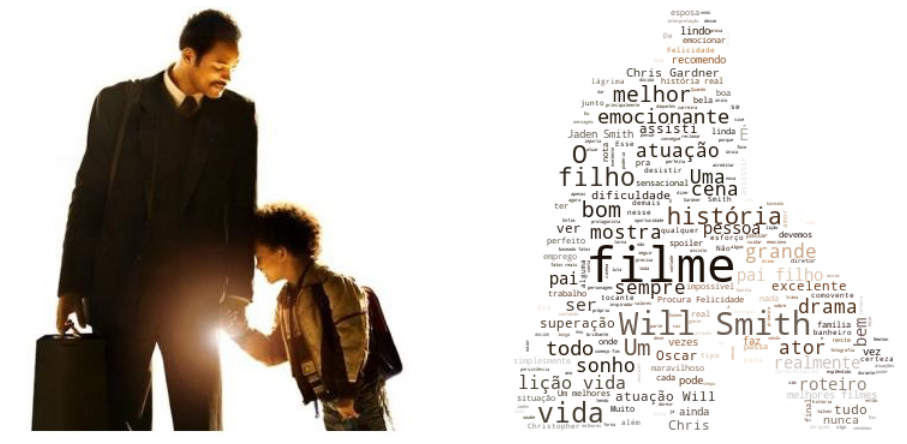

In [61]:
drawWordCoud(filtered_word_criticas, "À Procura da Felicidade")

#### Não fiquei muito satisfeito, queria mais palavras significativas emocionalemnte. Dessa forma, resolvi pegar apenas os adjetivos das críticas

### 8- Selecionando apenas os adjetivos e retirando algumas palavras não significativas

In [65]:
adjetivos = [word for (word, pos) in nltk.pos_tag(filtered_word_criticas) if (pos[:2] == 'JJ')]
print(adjetivos[:10])

['cena', 'tipo', 'passa', 'termos', 'surpreende', 'sabe', 'filho', 'excelente', 'real', 'deve']


In [ ]:
k = 'filme'                  # Removendo a palavra "filme"
while(k in adjetivos) :
    adjetivos.remove(k)

In [81]:
k = 'mostra'                  # Removendo a palavra "mostra"
while(k in adjetivos) :
    adjetivos.remove(k)

In [83]:
k = 'final'                  # Removendo a palavra "final"
while(k in adjetivos) :
    adjetivos.remove(k)

In [84]:
k = 'real'                  # Removendo a palavra "real"
while(k in adjetivos) :
    adjetivos.remove(k)

In [85]:
k = 'nunca'                  # Removendo a palavra "nunca"
while(k in adjetivos) :
    adjetivos.remove(k)

### 9- Plotando a 2º nuvem de palavras

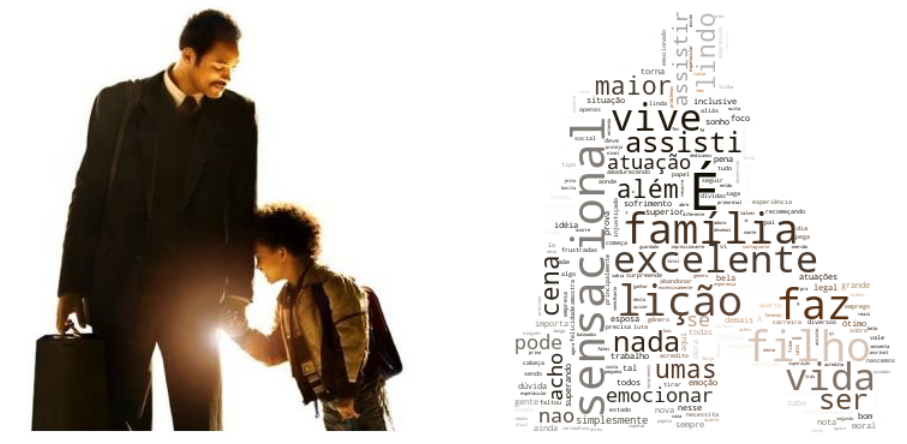

In [92]:
drawWordCoud(adjetivos, "À Procura da Felicidade")